In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [5]:
base = pd.read_csv('../AirPassengers.csv')
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


In [12]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('../AirPassengers.csv', parse_dates = ['Month'],
                  index_col = 'Month', date_parser = dateparse)

base

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [15]:
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [17]:
#criar série temporal
ts = base['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [18]:
#registro especifico
ts[1]

118

In [36]:
#visualização por ano e mês
ts['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [22]:
#visualização de intervalos
ts['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [23]:
#visualização de intervalos sem data de inicio
ts[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [38]:
#ano
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [25]:
#valores maximos
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [26]:
#minimos
ts.index.min()

Timestamp('1949-01-01 00:00:00')

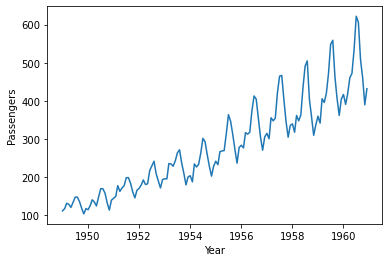

In [39]:
#visualização da serie temporal completa
plt.plot(ts)
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

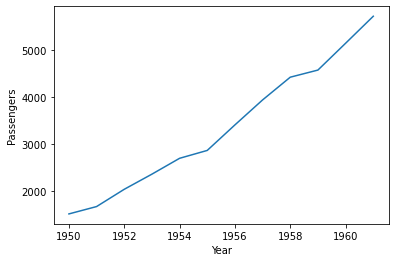

In [34]:
#visualização por ano
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

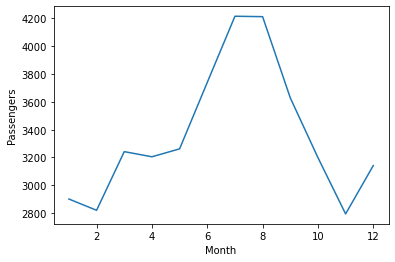

In [33]:
#visualização por mês
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

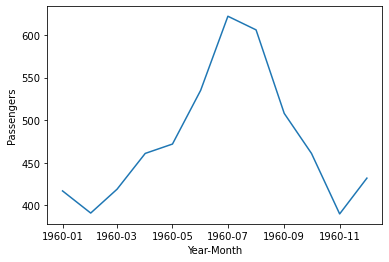

In [46]:
#visualização entre datas especificas
ts_dates = ts['1960-01-01':'1960-12-01']
plt.plot(ts_dates)
plt.xlabel('Year-Month')
plt.ylabel('Passengers')
plt.show()